In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os
import random

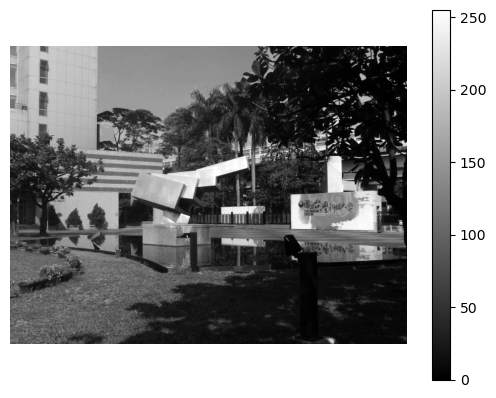

In [2]:
while(1):
    rate = int(input("Salt & Pepper rate (0~100): "))/100.0
    if abs(rate) > 1.0:
        print("Error input")
    else:
        break

img = cv.imread("./ntust_gray.jpg",cv.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img,"gray")
plt.axis('off')
plt.colorbar()

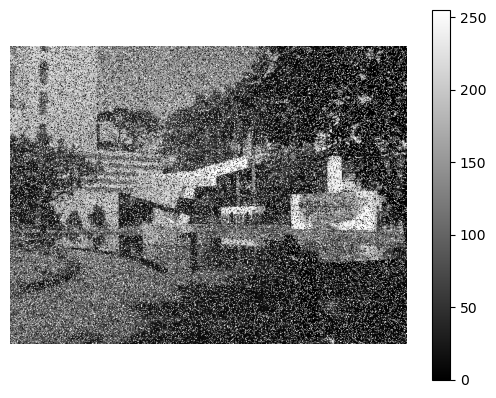

In [3]:
img_salt_pepper = img.copy()
SALT_VS_PEPPER = 0.5  # rate of Salt & Pepper
index = random.sample(range(img.size), int(img.size * rate))
rows = [row // img.shape[1] for row in index]      # Mapping to img[row][]
cols = [col % img.shape[1] for col in index]       # Mappting to img[][col]
amount = int(img.size * rate * SALT_VS_PEPPER)     # Number of Salt & Pepper
img_salt_pepper[rows[:amount], cols[:amount]]=255  # Add Salt
img_salt_pepper[rows[amount:], cols[amount:]]=0    # Add Pepper

plt.figure()
plt.imshow(img_salt_pepper,"gray")
plt.axis('off')
plt.colorbar()

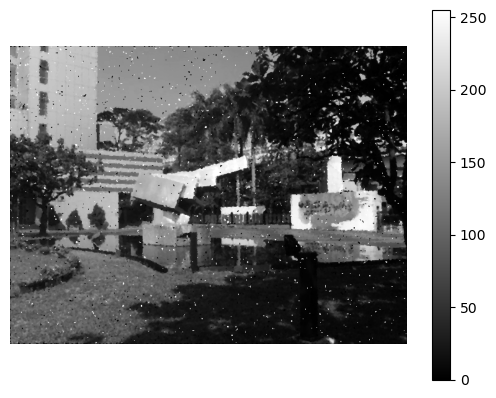

In [4]:
def median_filter(img, kernel_size):
    h ,w = img.shape
    img_new = np.zeros((h,w))
    img = np.pad(img, (kernel_size-1)//2)  # Padding img with kernel size
    for i in range(h):
        for j in range(w):
            img_new[i,j] = np.median((img[i:i+kernel_size,
                j:j+kernel_size]))   # Sum the array

    return img_new

img_mean = median_filter(img_salt_pepper.copy(), 3)

plt.figure()
plt.imshow(img_mean,"gray")
plt.axis('off')
plt.colorbar()

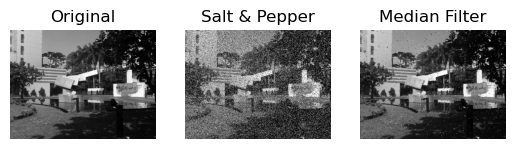

In [5]:
imgs = [img, img_salt_pepper, img_mean]
title = ["Original", "Salt & Pepper", "Median Filter"]
plt.figure
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i], "gray")
    plt.title(title[i])
    plt.axis('off')
plt.savefig('images/Result_Salt_And_Pepper.jpg')